In [14]:
import strax
import numpy as np
import json
from bson import json_util
import os
from helix import units
import helix as hx
import lz4.frame as lz4
import numba
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


# methods and classes marked with the @export decorator are added to the __all__ namespace to make them importable via
# the star-notation ('from .module_name import *')
export, __all__ = strax.exporter()


@export
def load_toy_data(path):
    """
    Converts lz4-compressed data file to a numpy array

    :param path: path to the data file
    :return: 1d int16 numpy array with the raw data
    """
    with open(path, mode='rb') as f:
        return np.frombuffer(lz4.decompress(f.read()), dtype=np.int16)


In [5]:
output1 = load_toy_data("/Users/wongdowling/Desktop/DELight_mtr/wk2/toy_data/run10/run10-00000")

In [6]:
output

array([23, 20, 33, ..., 44, 35, 17], dtype=int16)

In [7]:
len(output)

62500000

In [8]:
output1 = load_toy_data("/Users/wongdowling/Desktop/DELight_mtr/wk2/toy_data/run10/run10-00005")

In [9]:
len(output1)

62500000

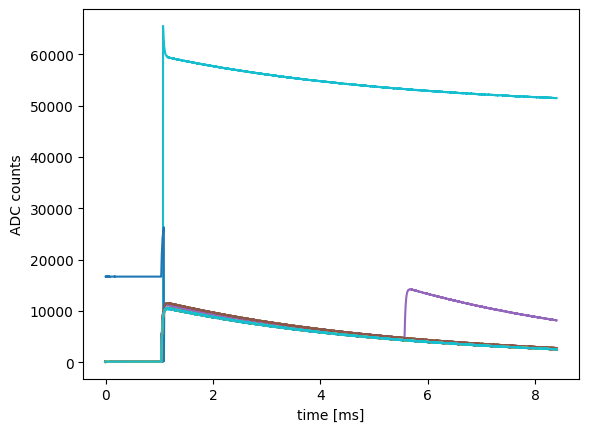

In [18]:
traces = pd.read_csv('traces.csv', header=None)

fig, ax = plt.subplots()
for j in range(100):
    plt.plot([i/32768*8.4 for i in range(len(traces.iloc[j]))], traces.iloc[j])
plt.xlabel(r"time [ms]")
plt.ylabel("ADC counts")
plt.show()

In [21]:
print(traces.shape)


(100, 32768)


In [22]:
print(output1.shape)


(62500000,)
